In [1]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from obsq.utils.core import convert_df_to_gdf
path = "/home/manat/projects/obsq/work/dev/data/data.duckdb"
target = 'expert_match'


In [ ]:
def plot_cat_rate(df, cat_col, target = target):
    output = "/home/manat/projects/obsq/work/dev/data/eda/preprocessed"
    rates = (
        df.groupby(cat_col)[target]
        .mean()
        .sort_values()
    )
    sns.barplot(x=rates.index[:20], y=rates.values[:20])
    plt.xticks(rotation=45, ha='right')   # or rotation=60, ha='right'
    plt.title(f"Observations rates for {cat_col}", fontsize=16)
    plt.savefig(f"{output}/{cat_col}_target_rates.jpg", dpi = 300, bbox_inches="tight")



In [3]:
def reduce_categories(df, col, k=20):
    top = df[col].value_counts().nlargest(k).index
    df[col + "_top"] = df[col].where(df[col].isin(top), "Other")
    return df


In [ ]:
con = duckdb.connect(path)
df = con.execute("""SELECT* FROM preprocessed.gbif_citizen_labeled""" ).df()
df = df.drop(columns= 'geom')
con.close()


In [5]:
gdf = convert_df_to_gdf(df)
#gdf.plot(marker = '*', column= target, markersize= 2)

In [6]:
#df = df[df['expert_match'] == 1 ]

In [7]:
df.shape

(44453, 31)

In [8]:
df.describe()

,gbifID,taxonKey,day,month,year,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,media_count,observed_on,num_identification_agreements,num_identification_disagreements,description_length,expert_match
count,4.445300e+04,4.445300e+04,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44103.000000,44453,44453.000000,44453.000000,3835.0,44453.000000
mean,4.305149e+09,4.114342e+06,15.503611,6.502238,2022.348458,45.504036,-72.554767,49.580748,1.811441,2022-11-05 00:28:59.545137,1.288822,0.006479,56.757236,0.085619
min,8.910220e+08,2.650633e+06,1.000000,5.000000,2011.000000,45.014886,-74.503593,0.000000,1.000000,2011-05-01 00:00:00,0.000000,0.000000,1.0,0.000000
25%,3.785138e+09,2.888763e+06,7.000000,6.000000,2021.000000,45.298086,-73.261628,2.000000,1.000000,2021-06-16 00:00:00,1.000000,0.000000,22.0,0.000000
50%,4.522694e+09,3.120060e+06,15.000000,7.000000,2023.000000,45.420311,-72.649174,6.000000,1.000000,2023-07-06 00:00:00,1.000000,0.000000,42.0,0.000000
75%,5.166933e+09,5.341297e+06,24.000000,7.000000,2025.000000,45.560980,-71.977290,29.000000,2.000000,2025-05-05 00:00:00,1.000000,0.000000,63.0,0.000000
max,5.868425e+09,1.220746e+07,31.000000,8.000000,2025.000000,46.817932,-70.230866,999.000000,37.000000,2025-08-31 00:00:00,7.000000,2.000000,655.0,1.000000
std,1.005814e+09,1.856381e+06,9.098905,1.080065,2.702038,0.374828,0.786790,123.237694,1.535219,NaN,0.584158,0.082170,65.51658,0.279803


In [9]:
df.describe(include=[object], exclude= [float, int])

,occurrenceID,publishingOrgKey,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,eventDate,recordedBy,issue,url,image_url,description
count,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,44453,3835
unique,44451,2,1,1,5,44,137,572,1325,1,1332,41937,2397,7,44451,44443,2503
top,https://www.inaturalist.org/observations/53731259,28eb1a3f-1c15-4a95-931a-4af90ecb574d,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Acer,Onoclea sensibilis,SPECIES,Onoclea sensibilis L.,2014-08-23,Vincent Laurie,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,https://www.inaturalist.org/observations/53731259,https://inaturalist-open-data.s3.amazonaws.com...,"Parc National du Mont St Bruno, Quebec, Canada"
freq,2,44451,44453,44453,32510,4762,4516,1672,743,44453,743,16,3005,41598,2,3,110


INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


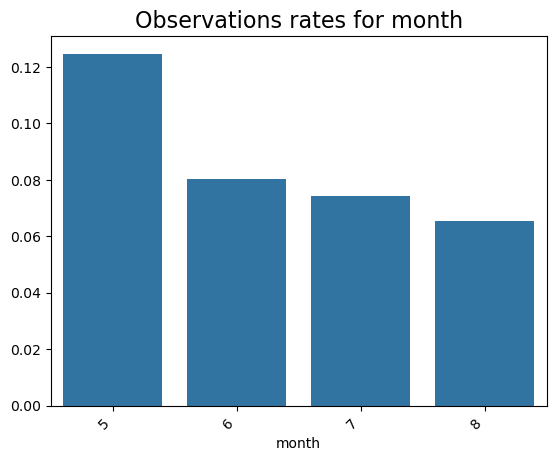

In [10]:
plot_cat_rate(df, 'month')

INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


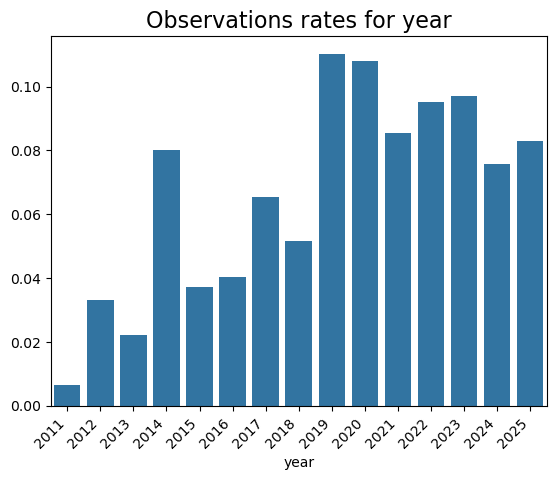

In [11]:
plot_cat_rate(df, 'year')

INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


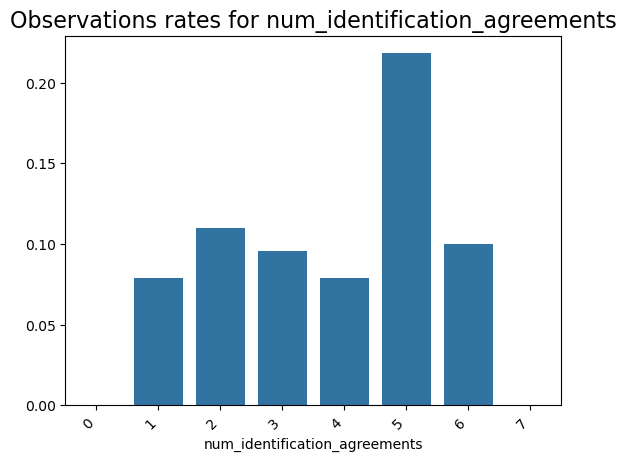

In [12]:
plot_cat_rate(df, "num_identification_agreements")

INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


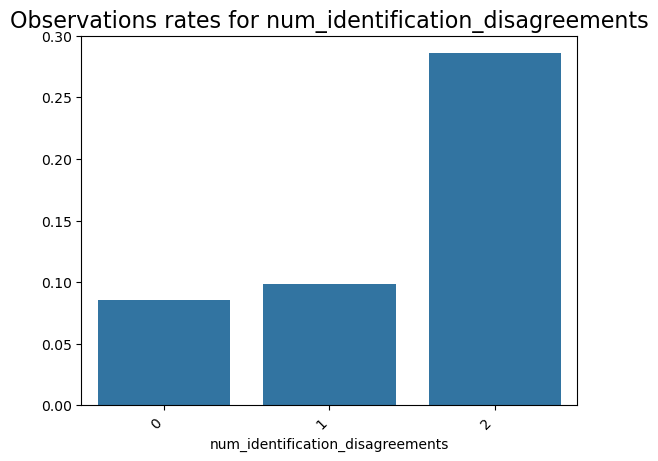

In [13]:
plot_cat_rate(df, "num_identification_disagreements")

In [21]:
#plot_cat_rate(df, "description_length")

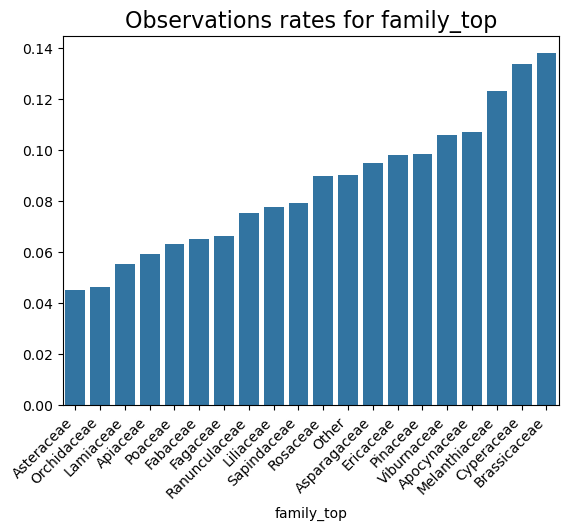

In [15]:
df = reduce_categories(df, 'family')
plot_cat_rate(df, "family_top")

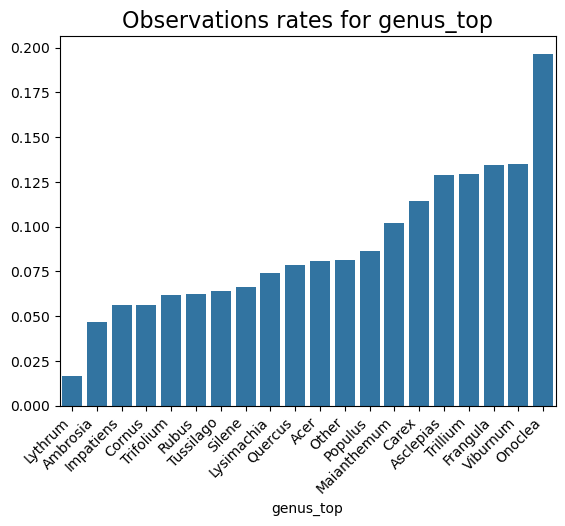

In [16]:
df = reduce_categories(df, 'genus')
plot_cat_rate(df, "genus_top")

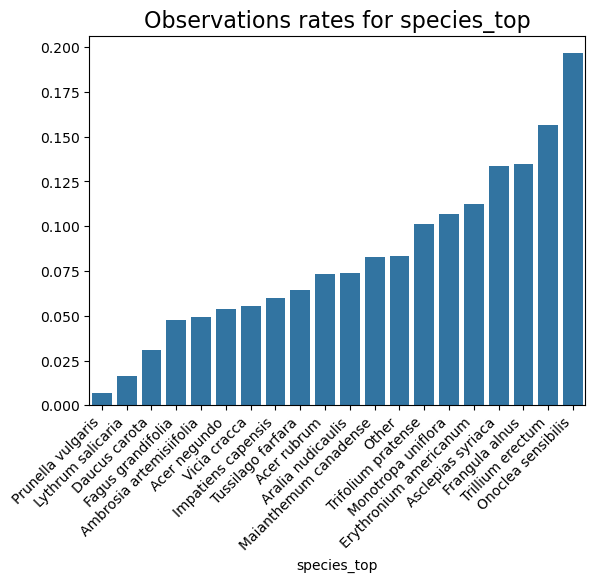

In [17]:
df = reduce_categories(df, 'species')
plot_cat_rate(df, "species_top")

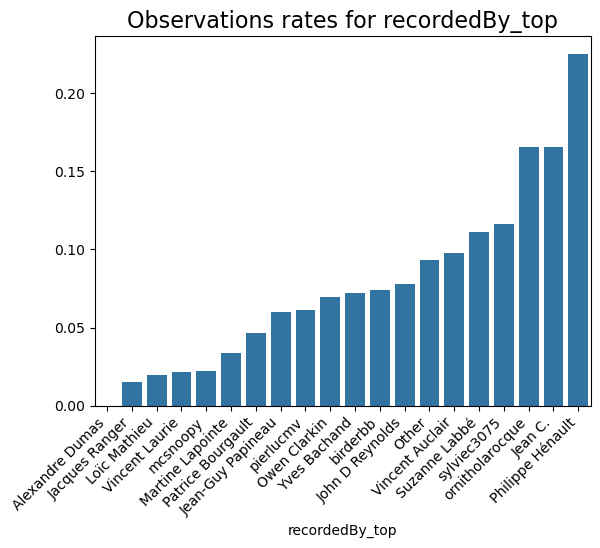

In [18]:
df = reduce_categories(df, 'recordedBy')
plot_cat_rate(df, "recordedBy_top")